In [10]:
#设置全行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
#导入使用的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']#用来正常显示中文标签

In [19]:
#导入数据，由于数据没有标题，避免将第一行作为标题，因此将标题设置为无
data = pd.read_csv(r"C:\Users\CDA\Desktop\CDNOW网站用户消费行为分析\CDNOW_master.txt",header=None,sep='\s+')

In [23]:
#设置数据列标题,查看数据以及数据信息
data.columns = ['user_id','order_dt','order_products','order_amount']
data.head()
data.info()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [28]:
#通过数据信息得知无缺失值，但需要转化order_dt格式
data['order_dt'] = pd.to_datetime(data.order_dt,format='%Y%m%d')

#新增一列，提取order_dt中的月份为数据，方便后期对月份进行分析
data['month'] = data.order_dt.values.astype('datetime64[M]')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [29]:
#进行简单的描述统计分析
data.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 大部分的订单只消费了少量的商品平均（2.4），有一定极值的干扰
- 用户的消费金额比较稳定，平均（35.89），中位数在25元，有一定极值的干扰
- 用户平均每笔订单购买2.4个商品，标准差在2.3，稍稍具有波动性。中位数在2个商品，75分位数在3个商品，说明绝大部分订单的购买量都不多。最大值在99个，数字比较高。购买金额的情况差不多，大部分订单都集中在小额。

# 按月数据分析
- 每月消费总金额
- 每月消费次数
- 每月产品购买量
- 每月的消费人数

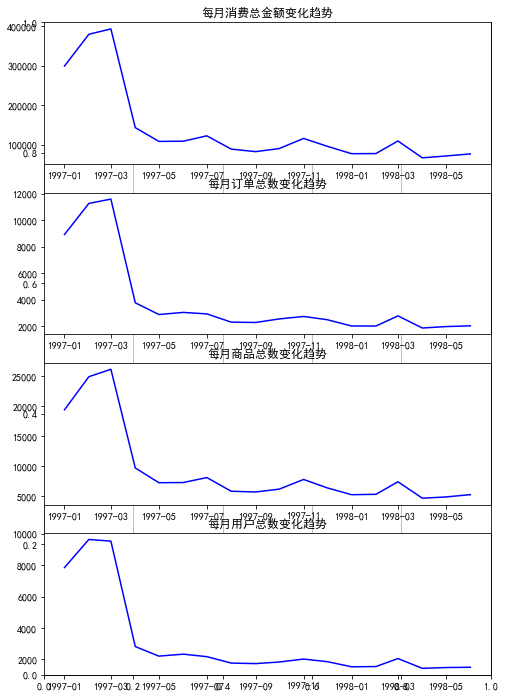

In [72]:
#按月数据分析

grouped_month = data.groupby('month')
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

#按月销售金额汇总
ax1.plot(grouped_month.order_amount.sum(),c='blue')
ax1.set_title('每月消费总金额变化趋势')

#按月订单数汇总
ax2.plot(grouped_month.order_amount.count(),c='blue')
ax2.set_title('每月订单总数变化趋势')

#按月商品总数汇总
ax3.plot(grouped_month.order_products.sum(),c='blue')
ax3.set_title('每月商品总数变化趋势')

#按月用户总数汇总
ax4.plot(grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())),c='blue')
ax4.set_title('每月用户总数变化趋势');
#图一：消费金额在前三个月达最高峰，或许消费金额较为平稳，有轻微下降趋势
#图二：前三个月订单数在10000笔左右，后续月份的订单数在2500左右
#图三：产品购买量  呈现早期购买量多  后期下降趋势
#图四：每月消费人数小小于每月的消费次数（订单数），但是区别不大，前三个月每月的消费人数在8000-10000之间，后续月份平均2000左右，一样是前期消费人数多，后期平稳下降趋势
#出现这种状况，假设问题是出现在用户身上，早期时间段的用户有异常值，或者由于各类促销营销，由于只有消费数据，无法进一步进行判断

In [107]:
#按月汇总的数据进行透视查看
data.pivot_table(index='month',
                values = ['order_products','order_amount','user_id'],
                aggfunc = {'order_products':'sum',
                           'order_amount':'sum',
                           'user_id':'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


SyntaxError: unexpected EOF while parsing (<ipython-input-110-b66e4e3cf637>, line 1)

# 用户个体消费分析
- 用户消费金额，消费次数描述统计
- 用户消费金额和消费次数的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累积消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [63]:
#用户消费金额和消费次数的描述统计
grouped_user = data.groupby('user_id')
grouped_user.sum().describe()
#用户平均购买量7张CD,标准差17，波动比较大，但是中位值只有3，说明小部分用户购买了大量的CD
#用户平均消费为106元，中位值为43，也有极值干扰
#消费的话一般都会符合二八法则

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 从用户角度看，每位用户平均购买7张CD，最多的用户购买了1033张。用户的平均消费金额（客单价）106元，标准差是240，结合分位数和最大值看，平均值才和75分位接近，肯定存在小部分的高额消费用户。
- 如果大家能够接触到消费、金融和钱相关的数据，基本上都符合二八法则，小部分的用户占了消费的大头

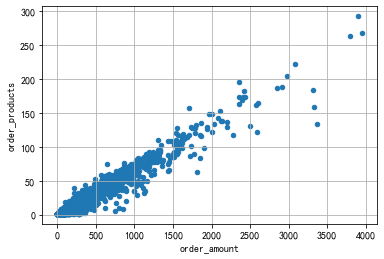

In [71]:
#用户消费金额和消费次数散点图，设置排除一些极值的干扰进行观察
grouped_user.sum().query('order_amount<4000').plot.scatter(x='order_amount',y='order_products')
plt.grid()
#绘制散点图，由于产品比较单一，购买金额和产品数呈线性关系，绘制用户的散点图，用户比较健康而且规律性很强。因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也因此呈线性，没几个离群点。

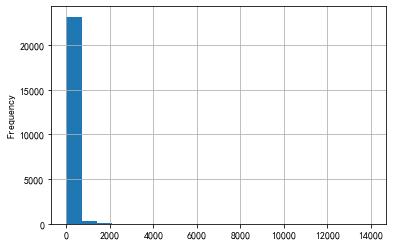

In [70]:
#用户消费金额的分布图（二八法则）
grouped_user.sum().order_amount.plot.hist(bins=20)
plt.grid()
#由直方图可知，用户消费金额，大部分消费金额能力确实不高，绝大部分呈几种在很低的消费档次，高消费用户在图中基本看不到，这也符合消费行为的行业规律
#小部分异常值干扰判断，可以过滤操作排除异常

- 从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现集中在很低的消费档次。高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律。
- 虽然有极致干扰了我们的数据，但是大部分的用户还是集中在比较低的而消费档次。

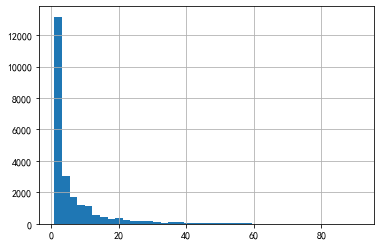

In [66]:
#用户消费频次分布图
grouped_user.sum().query('order_products<92').order_products.hist(bins=40)
#使用切比雪夫定理过滤异常值，计算95%的数据分布情况  （均值+5*标准差）

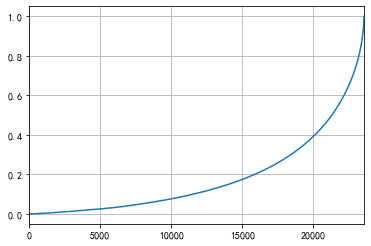

In [69]:
#用户累计消费金额占比
user_cumsum = grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())
user_cumsum.reset_index().order_amount.plot()
plt.grid()

按用户消费金额进行升序排序，由图可知50%的用户仅贡献了15%的销售额度。而排名前5000的用户就贡献了60%的消费额。也就是说我们只要维护了这5000个用户就可以把业绩KPI完成60%，如果能把5000个用户运营的更好就可以占比70%—80%之间。

In [68]:
print(user_cumsum.head(8))
print(user_cumsum.tail(8))
#下面是一些累积占比的数据，数据中存在金额为0，可能是一些活动赠送等原因

         order_products  order_amount
user_id                              
10175          0.000006           0.0
4559           0.000012           0.0
1948           0.000018           0.0
925            0.000024           0.0
10798          0.000030           0.0
19314          0.000036           0.0
21690          0.000042           0.0
10664          0.000048           0.0
         order_products  order_amount
user_id                              
499            0.975995      0.979023
22279          0.977961      0.980819
6569           0.979879      0.982806
7931           0.982940      0.985405
19339          0.985192      0.988025
7983           0.988385      0.990814
14048          0.994538      0.994404
7592           1.000000      1.000000


# 用户消费行为分析
- 用户第一次消费（首购）
- 用户最后一次消费
- 新老客户消费比
 - 多少用户仅仅消费了一次
 - 每月新客占比
- 用户分层
 - RFM
 - 新、老、活跃、回流、流失/不活跃
- 用户购买周期（按订单）
 - 用户消费周期描述
 - 用户消费周期分布
- 用户生命周期（按第一次 & 最后一次消费）
 - 用户生命周期描述
 - 用户生命周期分布

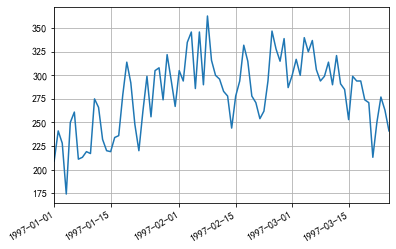

In [79]:
#第一次购买时间分布，min（）时间最小，第一次购买
grouped_user.min().order_dt.value_counts().plot(grid = True)
#2月发生较大下跌，渠道发生变化，或者其他，可以做一些假设
#用户第一次购买分布，集中在前三个月，其中2月11日至2月25日有一次剧烈波动

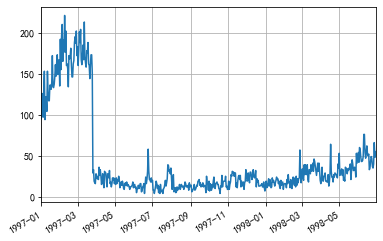

In [81]:
#最后一次购买时间分布
grouped_user.max().order_dt.value_counts().plot(grid=True)
#用户最后一次购买的分布比第一次购买分布广
#大部分最后一次购买在前三个月，说明很多用户购买一次后就不再进行购买
#随着时间递增，最后一次购买数在递增，消费呈线性流失上升的情况，用户忠诚度在慢慢下降

In [85]:
user_life = grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


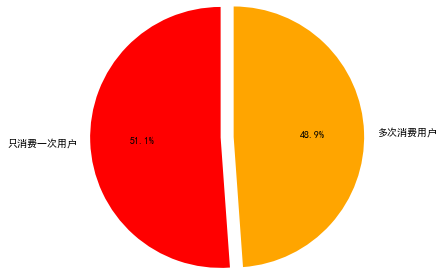

In [91]:
#仅消费一次顾客占比
rate = (user_life['min'] == user_life['max']).value_counts()
labels = ['只消费一次用户','多次消费用户']
plt.pie(rate,explode=(0,0.15),labels=labels,autopct='%2.1f%%',startangle=90,colors=['r','orange'],radius=1.5);
#True 第一次购买时间和最后一次购买时间一样，有一般用户只消费了一次

In [112]:
#用户分层 RFM模型，消费额、消费次数、最近一次消费进行透视
rfm = data.pivot_table(index = 'user_id',
                       values = ['order_products','order_amount','order_dt'],
                        aggfunc = {'order_dt':'max',
                                   'order_amount':'sum',
                                   'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [113]:
#表示离最近一次消费的时间间隔,数值越大，离现在的时间越长
-(rfm.order_dt -rfm.order_dt.max()).head()

user_id
1   545 days
2   534 days
3    33 days
4   200 days
5   178 days
Name: order_dt, dtype: timedelta64[ns]

In [114]:
#np.timedelta4(1,'D')消除单位 进行重命名
#R表示客户最近一次交易时间的间隔，客户在最近一段时间内交易的金额。F表示客户在最近一段时间内交易的次数,F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。M表示客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
#order_products求的是消费产品数，把它替换成消费次数也是可以，但是因为我们这里消费次数是比较固定的，所以使用消费产品数的维度。
rfm['R'] = -(rfm.order_dt-rfm.order_dt.max())/np.timedelta64(1,'D')
rfm.rename(columns = {'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [115]:
rfm[['R','F','M']].apply(lambda x:x-x.mean()).head()
#数据解读： 负数是小于的   正式大于的   
#R：离最近一次购买的天数   F：产品数（消费次数） M：消费金额   与均值的对比

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [119]:
def rfm_func(x):
    level =x.apply(lambda x:'1' if x>=0 else '0')
    #字符串拼接
    #R>0,是Juin平均消费时间越久，R越大，说明没有消费时间越久
    #F>0,M>0，消费次数和金额也是较高，重要价值客户，以此类推
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    return d[label]
# x - x.mean() （具体真实情况可以修改，不一定需要用均值）   切比雪夫也可以 > 200 极值人工处理掉
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()
#数据解读： 1  时间比较长，只消费了一次，消费金额低   一般挽留客户 

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户


In [120]:
rfm.groupby('label').sum()
#重要保持客户贡献了159万元

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


In [121]:

#不同层次用户的消费人数，之前重要保持客户的累计消费金额最高，这里重要保持客户的消费人数排名第二，但离一般挽留用户差距比较大，一般挽留用户有14074人，重要保持客户4554人

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


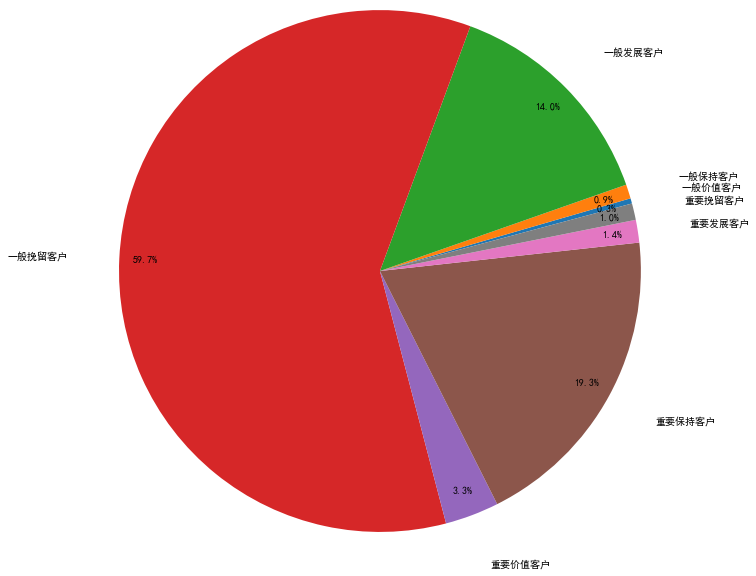

In [123]:
#各类类型用户占比
use_c = rfm.groupby('label').count()
plt.axis('equal')
labels = ['一般价值客户','一般保持客户','一般发展客户','一般挽留客户','重要价值客户','重要保持客户','重要发展客户','重要挽留客户']
plt.pie(use_c['M'],
        autopct ='%3.1f%%',#控制饼图内百分比设置,可以使用format字符串或者format function,'%1.1f'指小数点前后位数(没有用空格补齐)
        labels = labels,#每一块)饼图外侧显示的说明文字
        pctdistance=0.9,#指定autopct的位置刻度,默认值为0.6
        labeldistance=1.2,#label标记的绘制位置,相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧
        radius=3,#控制饼图半径，默认值为1
        startangle=15);#始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起

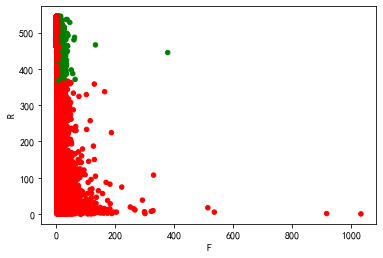

In [124]:
#对应标签，新增一列，使用不同颜色表示，绿色为重要价值客户，红色为非重要价值客户
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[~(rfm.label == '重要价值客户'),'color'] = 'r'
rfm.plot.scatter('F','R',c=rfm.color)

In [125]:
rfm.head()

,M,order_dt,F,R,label,color
user_id,,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户,r
2,89.00,1997-01-12,6,534.0,一般挽留客户,r
3,156.46,1998-05-28,16,33.0,重要保持客户,r
4,100.50,1997-12-12,7,200.0,一般发展客户,r
5,385.61,1998-01-03,29,178.0,重要保持客户,r


In [126]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


- 从RFM分层可知，大部分用户为重要保持客户，但是这是由于极值的影响，所以RFM的划分应该以业务为准。尽量用小部分的用户覆盖大部分的额度，不要为了数据好看划分等级，极值会拉均值，根据数据可以和业务相结合，如何提升一些重要的指标。

- RFM是人工使用象限法把数据划分为几个立方体，立方体对应相应的标签，我们可以把标签运用到业务层面上。比如重要保持客户贡献金额最多159203.62，我们如何与业务方配合把数据提高或者维护；而重要发展客户和重要挽留客户他们有一段时间没有消费了，我们如何把他们拉回来

In [129]:
#用户生命周期（按第一次&最后一次消费）
pivoted_counts = data.pivot_table(index = 'user_id',
                                  columns = 'month',
                                  values = 'order_dt',
                                  aggfunc = 'count').fillna(0)
pivoted_counts.head()
#按月份进行对比，1月份那些是购买的，再去对比二月份哪些是购买的

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


- 用户每个月的消费次数，对于生命周期的划分只需要知道用户本月是否消费，消费次数在这里并不重要，需要将模型进行简化
- 使用数据透视表，需要明确获得什么结果。有些用户在某月没有进行过消费，会用NaA表示，这里用filna填充。

In [136]:
#将消费过的替换成1，没消费过的替换成0
data_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
data_purchase.tail()
#第一次从3月分开始购买 前面补成0 ， 需要进行判，第一次消费作为生命周期的起始

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


对于尾部数据，user_id2W+的数据是有问题的，因为从实际的业务场景上说，他们一月和二月都没有注册三月份才是他们第一次消费。透视会把他们一月和二月的数据补上为0，这里面需要进行判断将第一次消费作为生命周期的起始，不能从一月份开始就粗略的计算

In [134]:
def active_status(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status)>0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,index=pivoted_counts.columns)

- 若本月没有消费
 - 若之前是未注册，则依旧未注册
 - 若之前有消费，则为流失/不活跃
 - 其他情况，为未注册
- 若本月有消费
 - 若是第一次消费，则为新用户
 - 如果之前有过消费，则上个月为不活跃，则为回流
 - 如果上个月为未注册，则为新用户
 - 除此之外，为活跃

- 主要分为两部分的判断，以本月是否消费为界。本月没有消费，还要额外判断他是不是新客，因为部分用户是3月份才消费成为新客，那么在1、2月份他连新客都不是，用unreg表示。如果是老客，则为unactive
- 本月若没有消费，需要判断是不是第一次消费，上一个时间窗口有没有消费。可以多调试几次理顺里面的逻辑关系，对用户进行分层。
- 《业内主流写法》
这里用户生命周期的状态变化是用数据透视表一次性做的，但在实际业务场景中我们可能用SQL把它作为中间表来处理。我们有了明细表，会通过明细表来计算出状态表；也就是它的数据上个月是什么样的情况得出来，比如上个月是新用户或者回流用户，我们直接用上个月的状态left join本月的状态。直接用SQL进行对比
- 可以用pandas将每个月的状态计算出来，不是逐行而是月份计算，先算出一月份哪些用户是新购买的，然后判断二月份是否购买，两者left join

In [137]:
#将用户所对应的生命周期状态传入之前的当月消费判断的表内
purchase_stats = data_purchase.apply(active_status,axis=1,result_type='expand')
purchase_stats.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [138]:
#未注册用户就不参与处理，设置为空值
purchase_status_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct
#数据解读： 一月份有7846个用户   然后2月份分叉为不活跃用户和活跃用户有8476个新用户等等,新用户转换为是否活跃等等 流失用户在增加

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


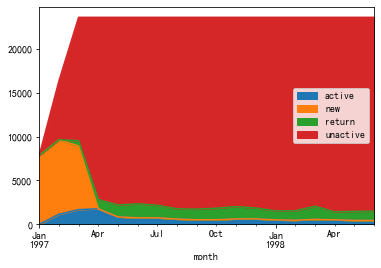

In [139]:
#各个状态的占比
purchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)
purchase_status_ct.fillna(0).T.plot.area()

由上表可知，每月的用户消费转改变化
- 活跃用户，持续消费的用户，对应的使消费运营质量 
- 回流用户，之前不消费本月才消费，对应的使唤回运营
- 不活跃用户，对应的是流失
- 这里可以针对业务模型下个定义：流失用户增加，回流用户正在减少


In [142]:
#用户购买周期（按订单）
#将用户分组后，每个用户的订单购买时间进行错位相减,一个用户可能多个订单  每个订单的间隔 
order_diff = grouped_user.apply(lambda x:x.order_dt-x.order_dt.shift())
order_diff.head(10)
#user_id 1为空值，表示该客户只购买过一个订单。user_id为2 的用户第二笔订单与第二笔订单在同一天购买

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [143]:
order_diff.describe()
#每个用户的平均订单是68天  中位值31天 最大值533天

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

user_id       
1        0         NaN
2        1         NaN
         2         0.0
3        3         NaN
         4        87.0
                  ... 
23568    69654    11.0
         69655    17.0
23569    69656     NaN
23570    69657     NaN
         69658     1.0
Name: order_dt, Length: 69659, dtype: float64

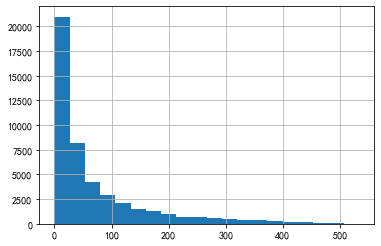

In [144]:
#去除单位，间隔天数分布图
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
order_diff/np.timedelta64(1,'D')
#订单周期呈指数分布，用户的平均购买周期是68天，绝大部分用户的购买周期都低于100天。

In [145]:
#整体生命周期
(user_life['max']-user_life['min']).describe()
#数据偏移比较大，中位数是0天也就是超过50%的用户他的生命周期是0天只购买了一次，但是平均生命周期有134天，最大值是544天

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

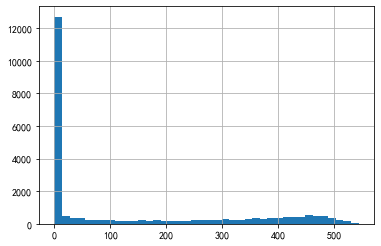

In [146]:
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=40)
#用户的生命周期受只购买一次的用户影响比较厉害 （可以进行排除 当特殊情况，想提取出购买一次以上的用户）
#用户均消费134天，中位数仅为0

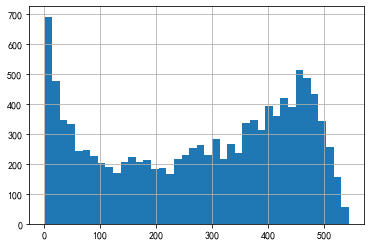

In [148]:
#用户生命周期大于0天分布图
#u_l = ((user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D'))
u_l[u_l>0].hist(bins=40)

- 筛选出lifetime>0,既排除了仅消费了一次那些人，有不少用户生命周期靠拢在0天，部分质量差的用户虽然消费了两次，但是任然无法持续，在用户首次消费30天内应该尽量引导。少部分用户集中在50—300天，属于普通型的生命周期。高质量用户的生命周期，集中在400天以后，这属于忠诚用户

# 复购率和回购率分析
- 复购率
 - 自然月内，购买多次的用户占比
- 回购率
 - 曾今购买过的用户在某一时期内的再次购买占比

In [149]:
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [150]:
#复购率
#购买大于1次的赋值为1，然后小于等于1的，如果购买次数是0，则赋值为空，否则就是购买一次，赋值为0
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x ==0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


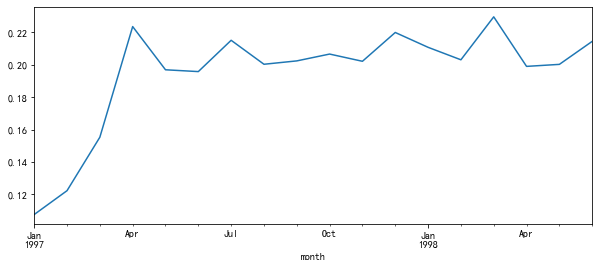

In [153]:
#sum()中0不计数，count()中0计数
(purchase_r.sum()/purchase_r.count()).plot(figsize = (10,4))

- 用sum和count相除即可计算出复购率。因为这两个函数都会忽略NAN，而NAN是没有消费的用户，count不论是0还是1都会统计，所以是总的消费用户数，而sum求何计算了两次以上的消费用户。这里用了比较巧妙的替代法计算复购率，SQL中也可以用。
- 图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，譬如1月新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客户，复购率比较稳定，在20%左右.
单看新客和老客，复购率有三倍左右的差距
- 接下来计算回购率。回购率是某一个时间窗口内消费的用户，在下一个时间窗口人就消费的占比。我1月消费用户1000，他们中有300个2月依然消费，回购率是30%

In [154]:
#回购率
data_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [156]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i]==1:#本月进行过消费
            if data[i+1] ==1:#下个月是否进行消费
                status.append(1)#消费为1，回购了
            if data[i+1] ==0:#本月未消费
                status.append(0)#未消费为0，没有回购
        else:
            status.append(np.NaN)#之前没消费则不计
    status.append(np.NaN)#最后一个月没有判断需要补上
    return pd.Series(status,data_purchase.columns)
purchase_b = data_purchase.apply(purchase_back,axis=1)
purchase_b.head(5)
#0 表示上个月购买了，下个月没有进行消费，则是没有回购 
#1代表当月消费过次月依旧消费，表示回购了
#NAN表示当月没有消费（不进行计算）

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


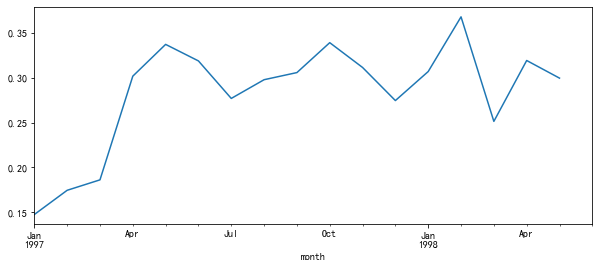

In [157]:
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))

- 0代表当月消费过次月没有消费过，1代表当月消费过次月依然消费
- 新建一个判断函数。data是输入数据，既用户在18个月内是否消费的记录，status是空列表，后续用来保存用户是否回购的字段。因为有18个月，所以每个月都要进行一次判断，需要用到循环。if的主要逻辑是，如果用户本月进行过消费，且下月消费过，记为1，没有消费过是0.本月若没有进行过消费，为NAN，后续的统计中进行排除。apply函数应用在所有行上，获得想要的结果。
- 最后计算和复购率大同小异，用count和sum求出，从图中可以看出，用户的回购率高于复购,约在30%左右，和老客户差异不大。从回购率和复购率综合分析可以得出，新客的整体质量低于老客，老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。